 # Notes and exercises from [Nielsen2015](http://neuralnetworksanddeeplearning.com/)
 ---

In [1]:
%reset


 ## Ch. 1.1 - Perceptrons

 $ y =
   \begin{cases}
       0 & \text{if } \sum_i w_i x_i \geq \text{threshold} \\
       1 & \text{if } \sum_i w_i x_i < \text{threshold}
   \end{cases} $

 where $y = \text{output}$, $x_i = \text{input}$, and $w_i = \text{weights}$.

 Rewrite conditions as $\boldsymbol{w} \cdot \boldsymbol{x} + b \leq 0$, $> 0$
 where $b = -\text{threshold}$ is the *bias*.

 Perceptrons can be combined to give $\text{AND}, \text{OR}, \text{NAND}$, etc.
 and perform any basic computation.

 ## Ch. 1.2 - Logistic/Sigmoid Neurons

 To optimize $w_i$, the output $y$ should be defined by
 a differentiable *transfer* or *activation* function.

 Let's replace it with the *logistic* or *sigmoid* function
 $$f(z) = \frac{1}{1 + \mathrm{e}^{-z}}$$
 where $z = \boldsymbol{w} \cdot \boldsymbol{x} + b$.

 Thus,
 $$\Delta y \approx \sum_i \frac{\partial y}{\partial w_i} \Delta w_i + \frac{\partial y}{\partial b} \Delta b$$

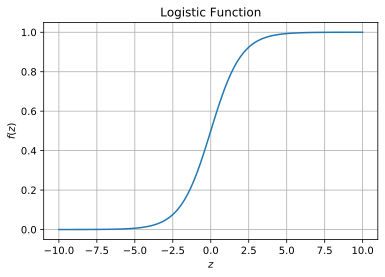

In [2]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-10, 10, 100)
f = 1/(1 + np.exp(-z))

plt.plot(z, f)
plt.xlabel('$z$')
plt.ylabel('$f(z)$')
plt.title('Logistic Function')
plt.rc('grid', linestyle = '--', color = 'gray')
plt.grid(True)
plt.show()


 ## Ch. 1.3 - Architecture of Neural Networks

 Layers: *input*, *hidden*, and *output*.

 *Feedforward* neural networks: no loop back.
 *Recurrent* neural networks: feedback loops allowed.

 ## Ch. 1.4 - Simple Network to Classify Handwritten Digits

 Read handwritten digits = *segmentation* + *classification*.

 Exercise: classify greyscale images of handwritten digits ($28 \times 28$ pixels) in
 [MNIST](http://yann.lecun.com/exdb/mnist/) dataset
 (60,000 labeled training images, 10,000 labeled test images)

 | Filename | Content | Size |
 | --- | --- | --- |
 | `train-images-idx3-ubyte.gz` | training set images | $9912422$ bytes |
 | `train-labels-idx1-ubyte.gz` | training set labels | $28881$ bytes |
 | `t10k-images-idx3-ubyte.gz` | test set images | $1648877$ bytes |
 | `t10k-labels-idx1-ubyte.gz` | test set labels | $4542$ bytes |
 Unzip and read test labels

In [3]:
%reset
import gzip 
with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/t10k-labels-idx1-ubyte.gz', 'rb') as hFile:
    t10k_lab_data = hFile.read()
hFile.close()


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Convert binary data to integer array
print(int.from_bytes(t10k_lab_data[0:4], byteorder = 'big', signed = False))
t10k_num = int.from_bytes(t10k_lab_data[4:8], byteorder = 'big', signed = False)

t10k_lab = -1*np.ones((t10k_num, 1))
for i in range(t10k_num): 
    t10k_lab[i] = t10k_lab_data[i + 8]

# Delete bin data
t10k_lab_data = None
del t10k_lab_data


2049


In [5]:
# Unzip and read test images
with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/t10k-images-idx3-ubyte.gz', 'rb') as hFile:
    t10k_img_data = hFile.read()
hFile.close()
hFile = None
del hFile 


In [6]:
# As before...
print(int.from_bytes(t10k_lab_data[0:4], byteorder = 'big', signed = False))
print(int.from_bytes(t10k_lab_data[4:(4+4)], byteorder = 'big', signed = False))
numRow = int.from_bytes(t10k_img_data[8:(8+4)], byteorder = 'big', signed = False)
numCol = int.from_bytes(t10k_img_data[12:(12+4)], byteorder = 'big', signed = False)

# Image data
numPix = numRow*numCol
t10k_img = -1*np.ones((t10k_num, numPix))
k = 0
for i in range(t10k_num):
    for j in range(numPix):
        k = k + 1
        t10k_img[i, j] = t10k_img_data[i*(numPix) + j + 16]

# Delete bin data
t10k_img_data = None
del t10k_img_data



NameError: name 't10k_lab_data' is not defined

NameError: name 't10k_img' is not defined

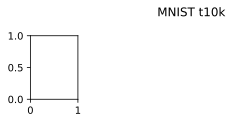

In [7]:
fig = plt.figure(1)
fig.suptitle('MNIST t10k')
for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.imshow(np.reshape(t10k_img[i, 0:numPix], (numRow, numCol)))
    ax.set_aspect(aspect = 1)
    ax.tick_params(axis = 'x', bottom = False, labelbottom = False)
    ax.tick_params(axis = 'y', left = False, labelleft = False)
    ax.set_title('%(index)d (%(label)d)' % {'index': i, 'label': t10k_lab[i]})

ax = None
del ax
fig = None
del fig


 Approach: 784 nodes in input layer, $n = 15$ nodes in single hidden layer,
 10 nodes in output layer ($0 \ldots 9$).

 $x = (784 \times 1)$ vector, $y = (10 \times 1)$ vector

 Define a *cost* (*loss* or *objective*) function:
 $$C(\boldsymbol{w}, b) = \frac{1}{2 n} \sum_\boldsymbol{x} || \boldsymbol{y}(\boldsymbol{x}) - \boldsymbol{a} ||^2 $$
 where $n$ is the number of training inputs and
 $\boldsymbol{a} = \boldsymbol{a}(\boldsymbol{w}, \boldsymbol{x}, b)$ is the network output given $\boldsymbol{x}$.
 This $C$ is a *quadratic* cost function or the *mean square error* (MSE).

 Let's consider how to minimize $C$ over $\boldsymbol{w}, b$
 such that $\boldsymbol{a} \rightarrow \boldsymbol{y} \ \forall \ \boldsymbol{x}$ in the training set.

 One technique is *gradient descent*.
 $$\Delta C \approx \sum_i \frac{\partial C}{\partial w_i} \Delta w_i = \nabla C \cdot \Delta w $$
 where $\Delta w$ is chosen to be $-\eta \nabla C$ (for some $\eta > 0$)
 to ensure that $\Delta C = - \eta |\nabla C |^2 \leq 0 $.

 Thus, $\boldsymbol{w} \rightarrow \boldsymbol{w} - \eta \nabla C$
 would allow us to iteratively approach a (local) minimum of $C$,
 where $\eta = \frac{\epsilon}{| \nabla C |}$ and $\epsilon$ is some small value.

 Problem: Computation of $C$ becomes slow if there are many $\boldsymbol{x}$.

 Solution: *Stochastic gradient descent*
 $$ \nabla C \approx \sum_{\{\boldsymbol{x}\}} \nabla C_\boldsymbol{x}$$
 where $\{ \boldsymbol{x} \}$ is some small, randomly chosen subset of all $\boldsymbol{x}$.

 # Implementing network to classify the MNIST digits

In [8]:
# Import data
%reset
import gzip 
import numpy as np
import matplotlib.pyplot as plt

with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/train-labels-idx1-ubyte.gz', 'rb') as hFile:
    train_lab_data = hFile.read()
hFile.close()
with gzip.open('E:/Documents/Projects/learning-exercises/datasets/MNIST/train-images-idx3-ubyte.gz', 'rb') as hFile:
    train_img_data = hFile.read()
hFile.close()

hFile = None
del hFile 


In [9]:
# Convert binary data to integer array

# Label data
print(int.from_bytes(train_lab_data[0:4], byteorder = 'big', signed = False))
train_num = int.from_bytes(train_lab_data[4:8], byteorder = 'big', signed = False)

train_lab = -1*np.ones((train_num, 1))
for i in range(train_num): 
    train_lab[i] = train_lab_data[i + 8]
train_lab_data = None
del train_lab_data

# Image data
print(int.from_bytes(train_img_data[0:4], byteorder = 'big', signed = False))
print(int.from_bytes(train_img_data[4:(4+4)], byteorder = 'big', signed = False))
numRow = int.from_bytes(train_img_data[8:(8+4)], byteorder = 'big', signed = False)
numCol = int.from_bytes(train_img_data[12:(12+4)], byteorder = 'big', signed = False)



2049
2051
60000


 Split 60k training set into smaller 50k training set
 and 10k *validation* set.
 Image data

In [10]:
numPix = numRow*numCol
train_img = -1*np.ones((50000, numPix))
valid_img = -1*np.ones((10000, numPix))
k = 0
for i in range(50000):
    for j in range(numPix):
        train_img[i, j] = train_img_data[i*(numPix) + j + 16]
        k = k + 1

for i in range(10000):
    for j in range(numPix):
        valid_img[i, j] = train_img_data[i*(numPix) + j + 16 + k]

train_img_data = None
del train_img_data

# Label data
valid_lab = train_lab[50000:60000]
train_lab = train_lab[0:50000]


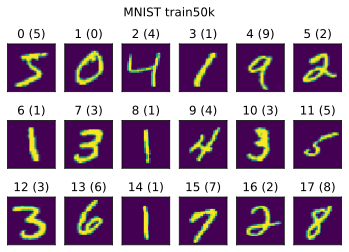

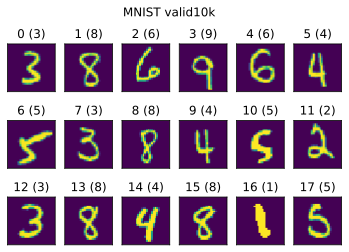

In [11]:
fig = plt.figure(1)
fig.suptitle('MNIST train50k')
for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.imshow(np.reshape(train_img[i, 0:numPix], (numRow, numCol)))
    ax.set_aspect(aspect = 1)
    ax.tick_params(axis = 'x', bottom = False, labelbottom = False)
    ax.tick_params(axis = 'y', left = False, labelleft = False)
    ax.set_title('%(index)d (%(label)d)' % {'index': i, 'label': train_lab[i]})

fig = plt.figure(2)
fig.suptitle('MNIST valid10k')
for i in range(18):
    ax = fig.add_subplot(3, 6, i + 1)
    ax.imshow(np.reshape(valid_img[i, 0:numPix], (numRow, numCol)))
    ax.set_aspect(aspect = 1)
    ax.tick_params(axis = 'x', bottom = False, labelbottom = False)
    ax.tick_params(axis = 'y', left = False, labelleft = False)
    ax.set_title('%(index)d (%(label)d)' % {'index': i, 'label': valid_lab[i]})

ax = None
del ax
fig = None
del fig
